In [61]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

# load information from that file(deserializing)
x_train = pickle.load(open('Q2_data/X_train.pkl', 'rb'))
y_train = pickle.load(open('Q2_data/Y_train.pkl', 'rb'))
x_test = pickle.load(open('Q2_data/X_test.pkl', 'rb'))
y_test = pickle.load(open('Q2_data/Fx_test.pkl', 'rb'))
x_train.shape, y_train.shape, x_test.shape, y_test.shape 

((20, 400), (20, 400), (80,), (80,))

Model degree 1 with different datasets:


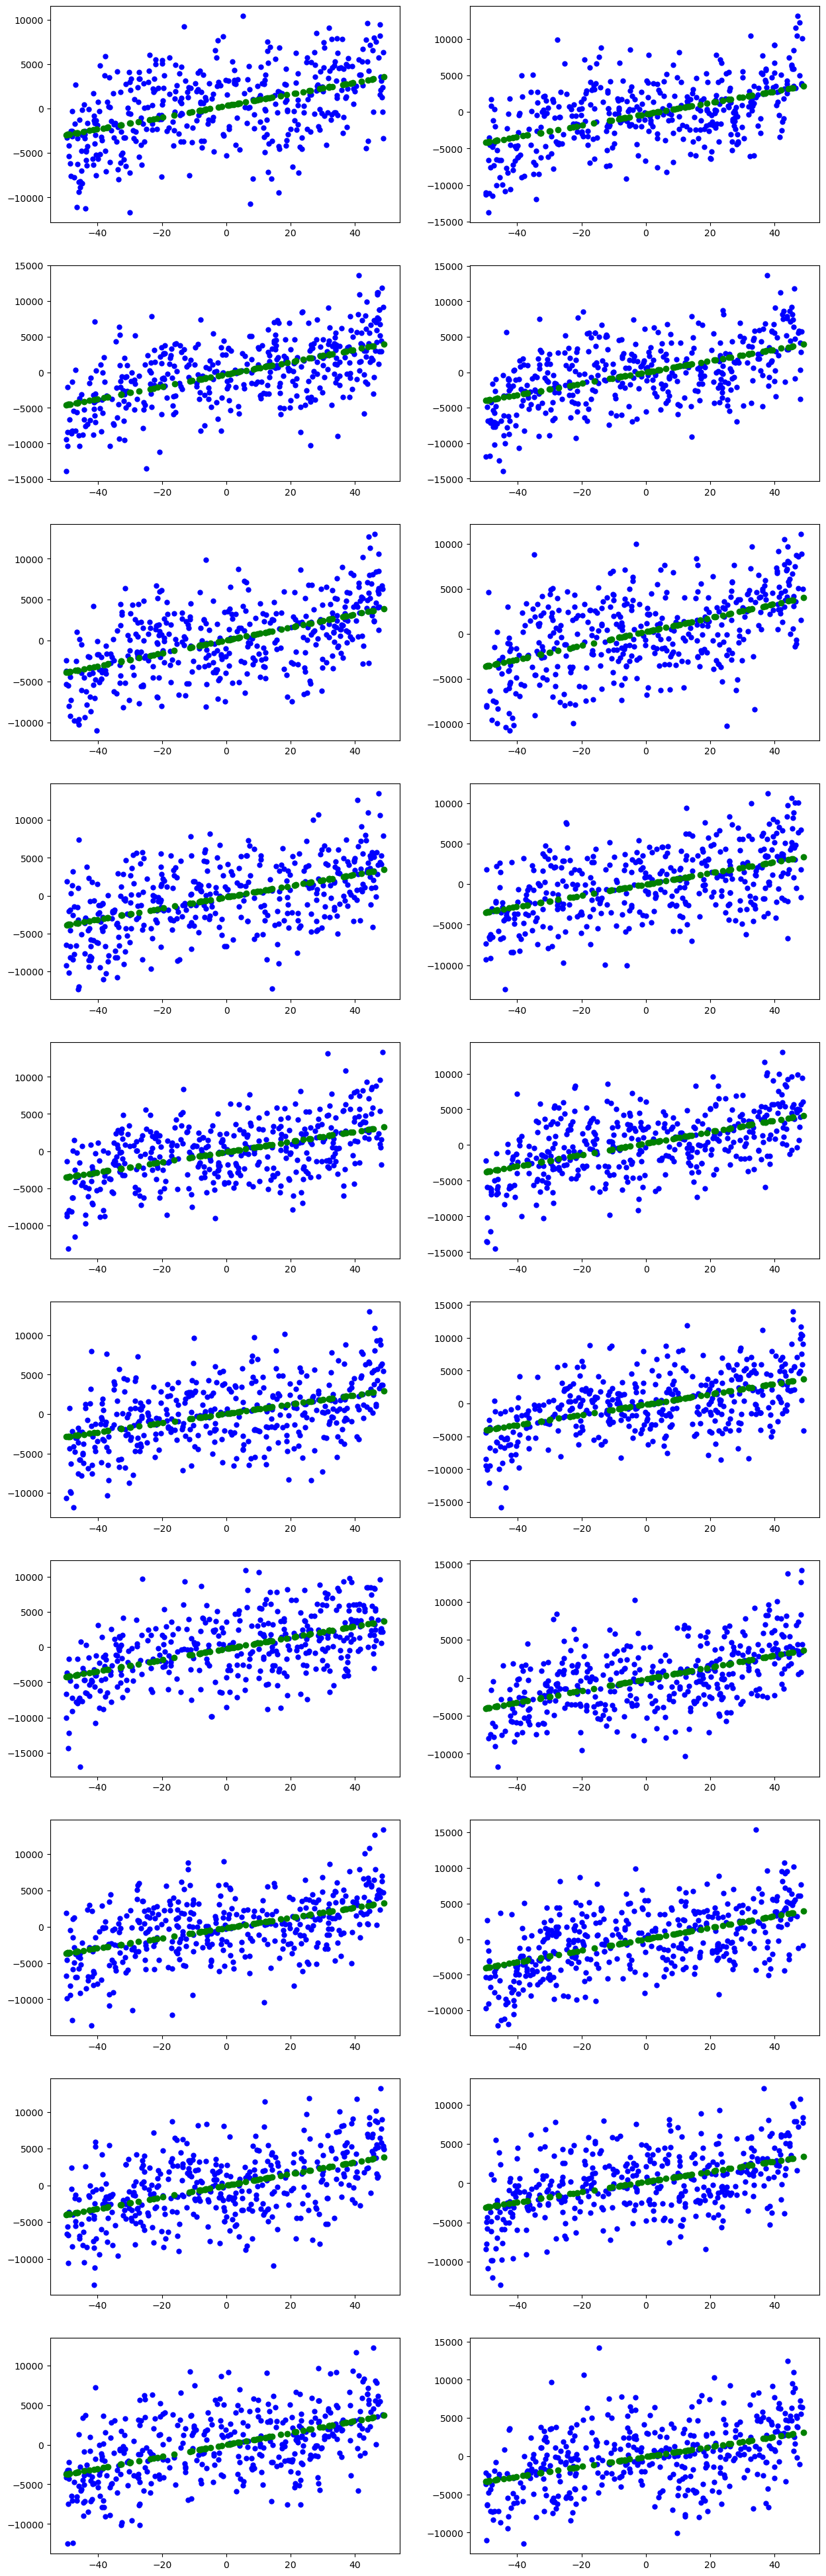

Model degree 2 with different datasets:


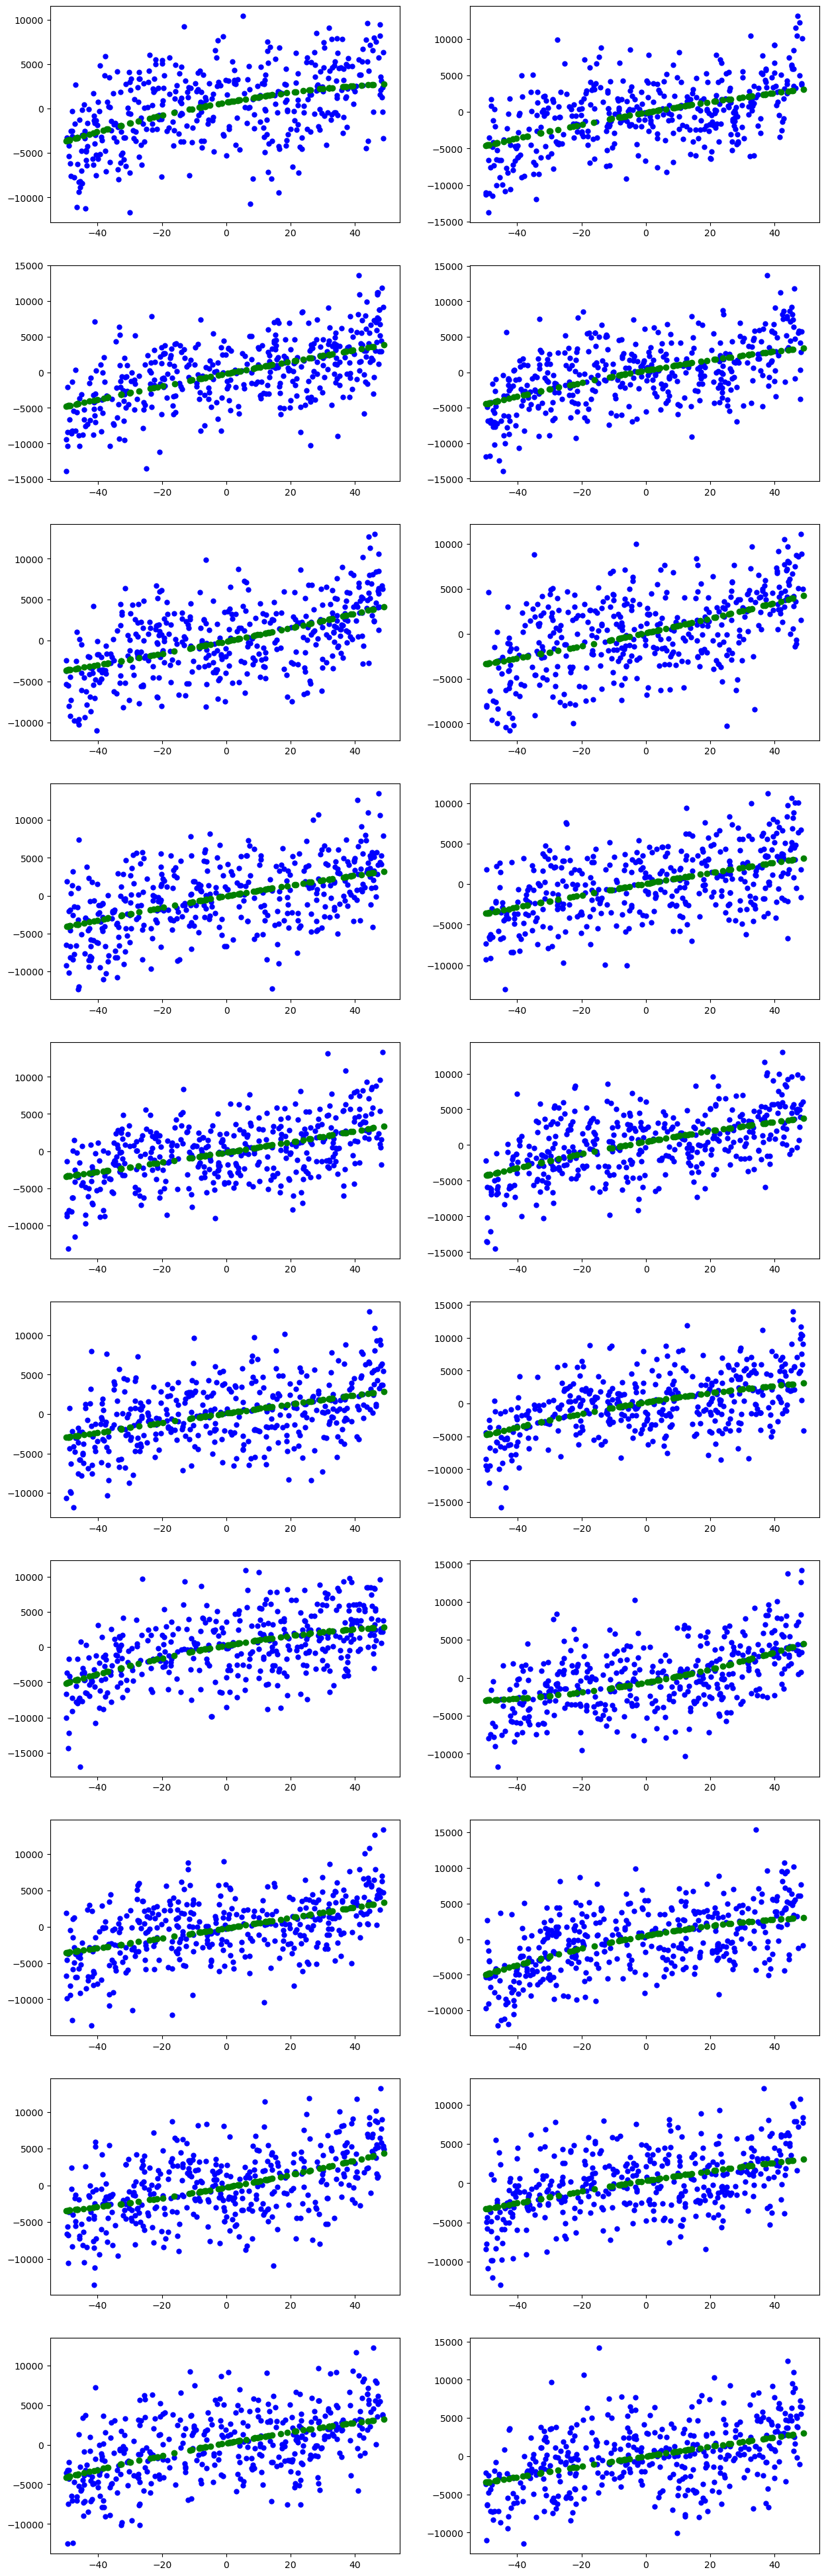

Model degree 3 with different datasets:


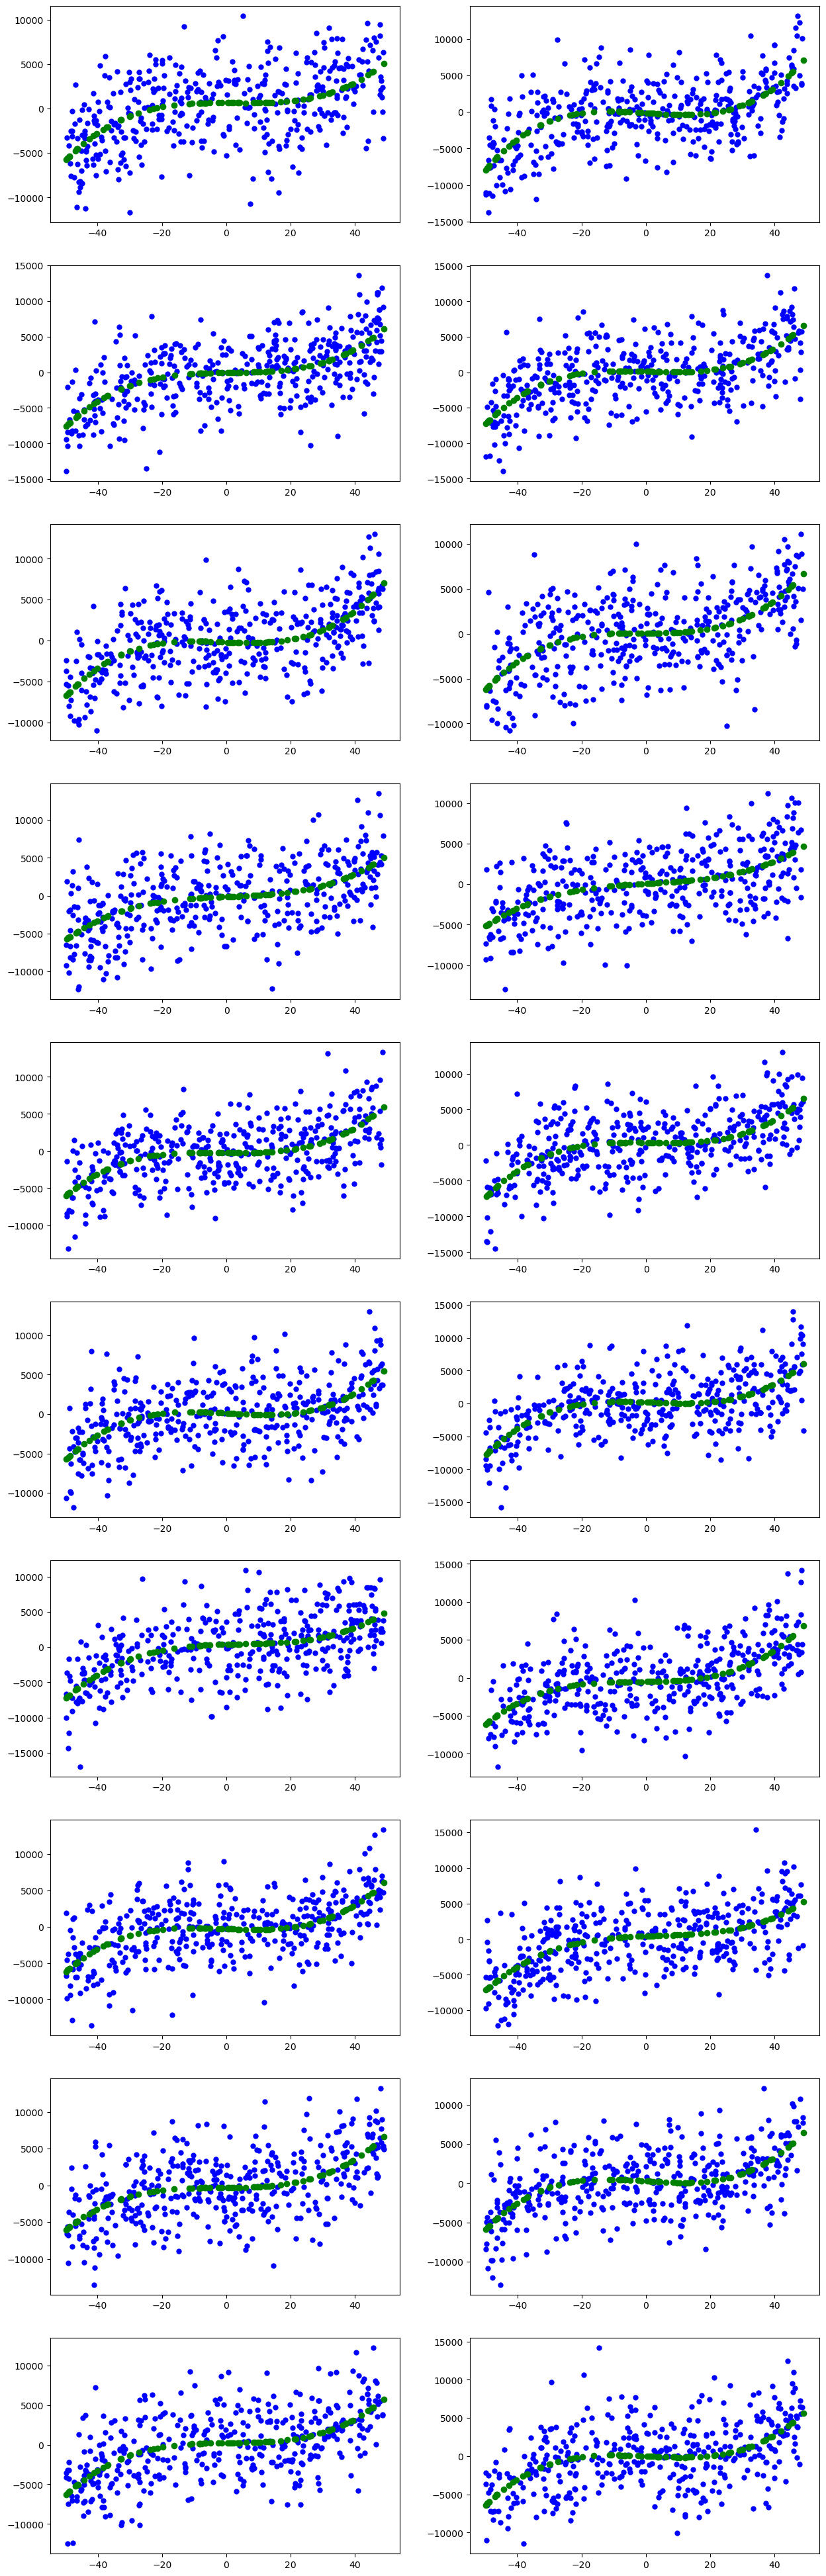

Model degree 4 with different datasets:


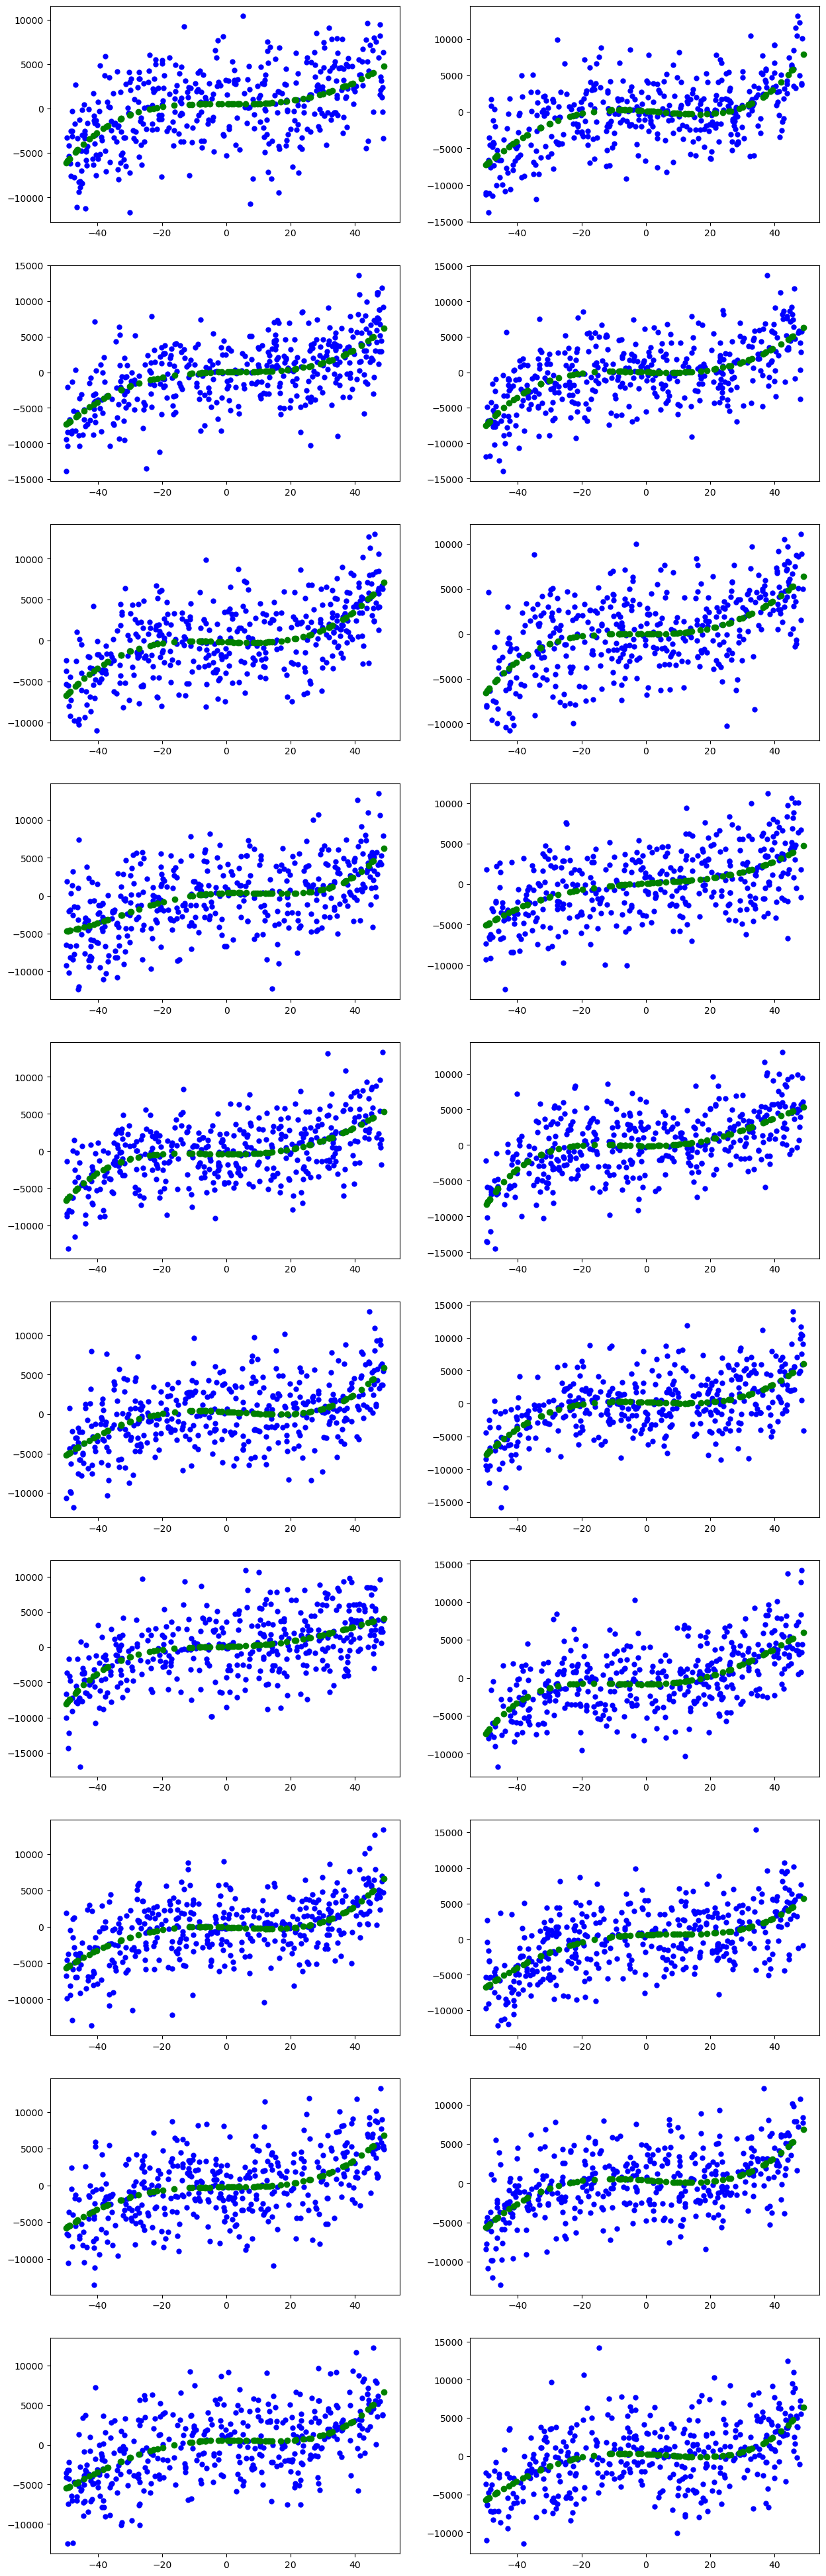

Model degree 5 with different datasets:


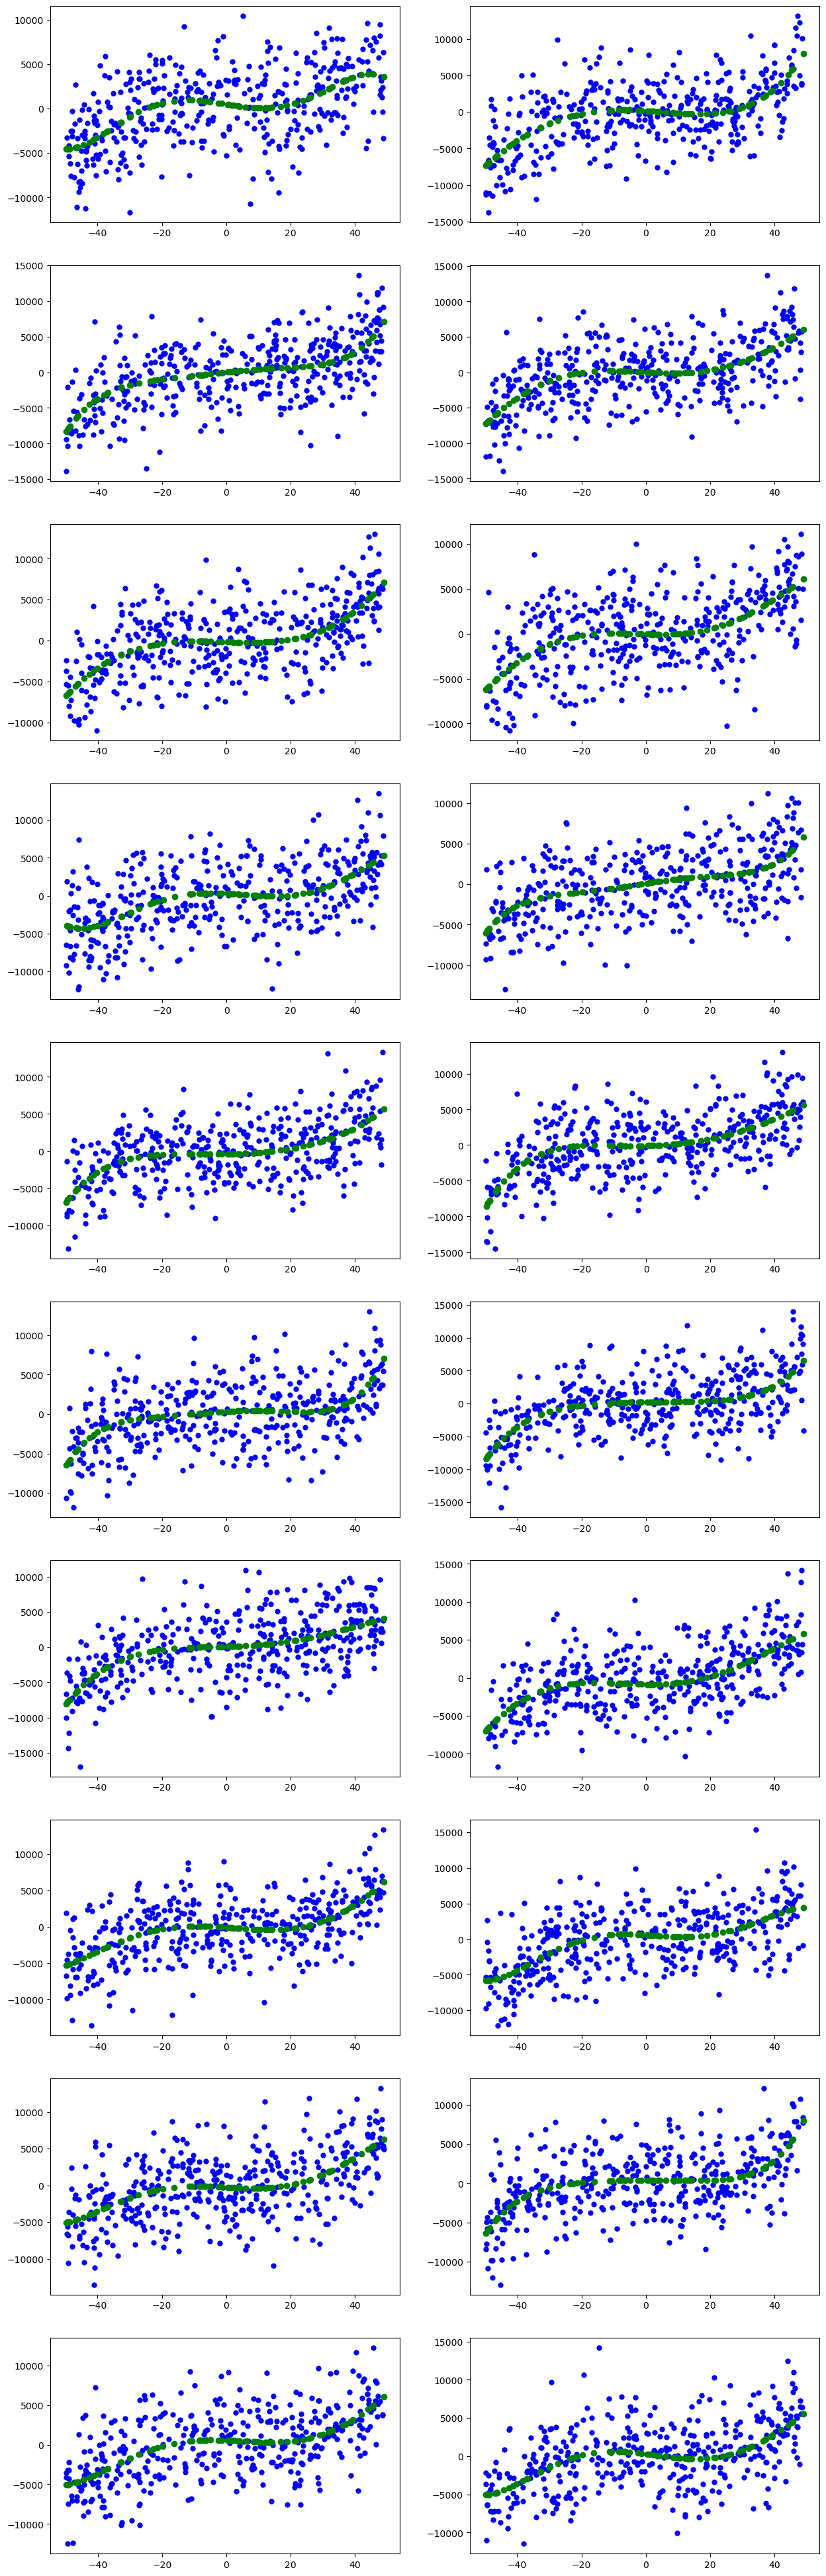

Model degree 6 with different datasets:


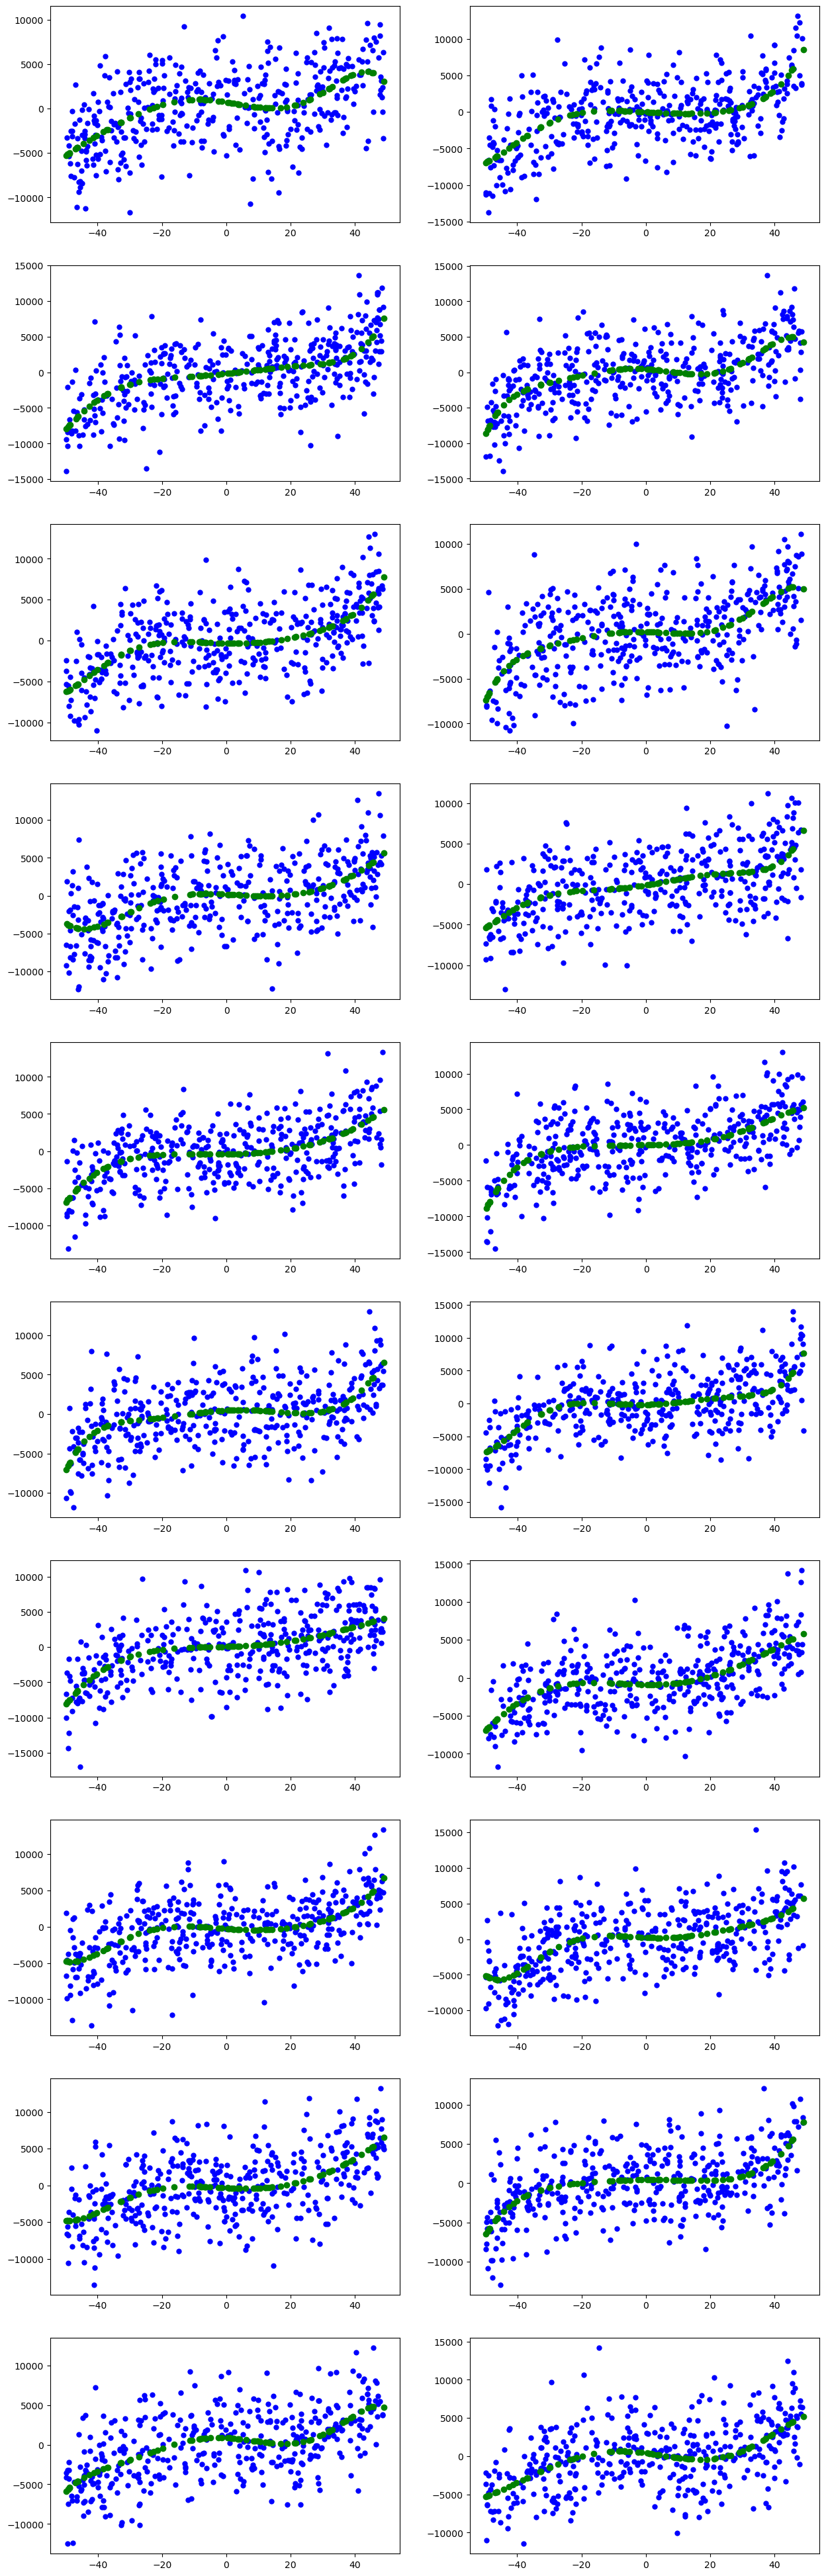

Model degree 7 with different datasets:


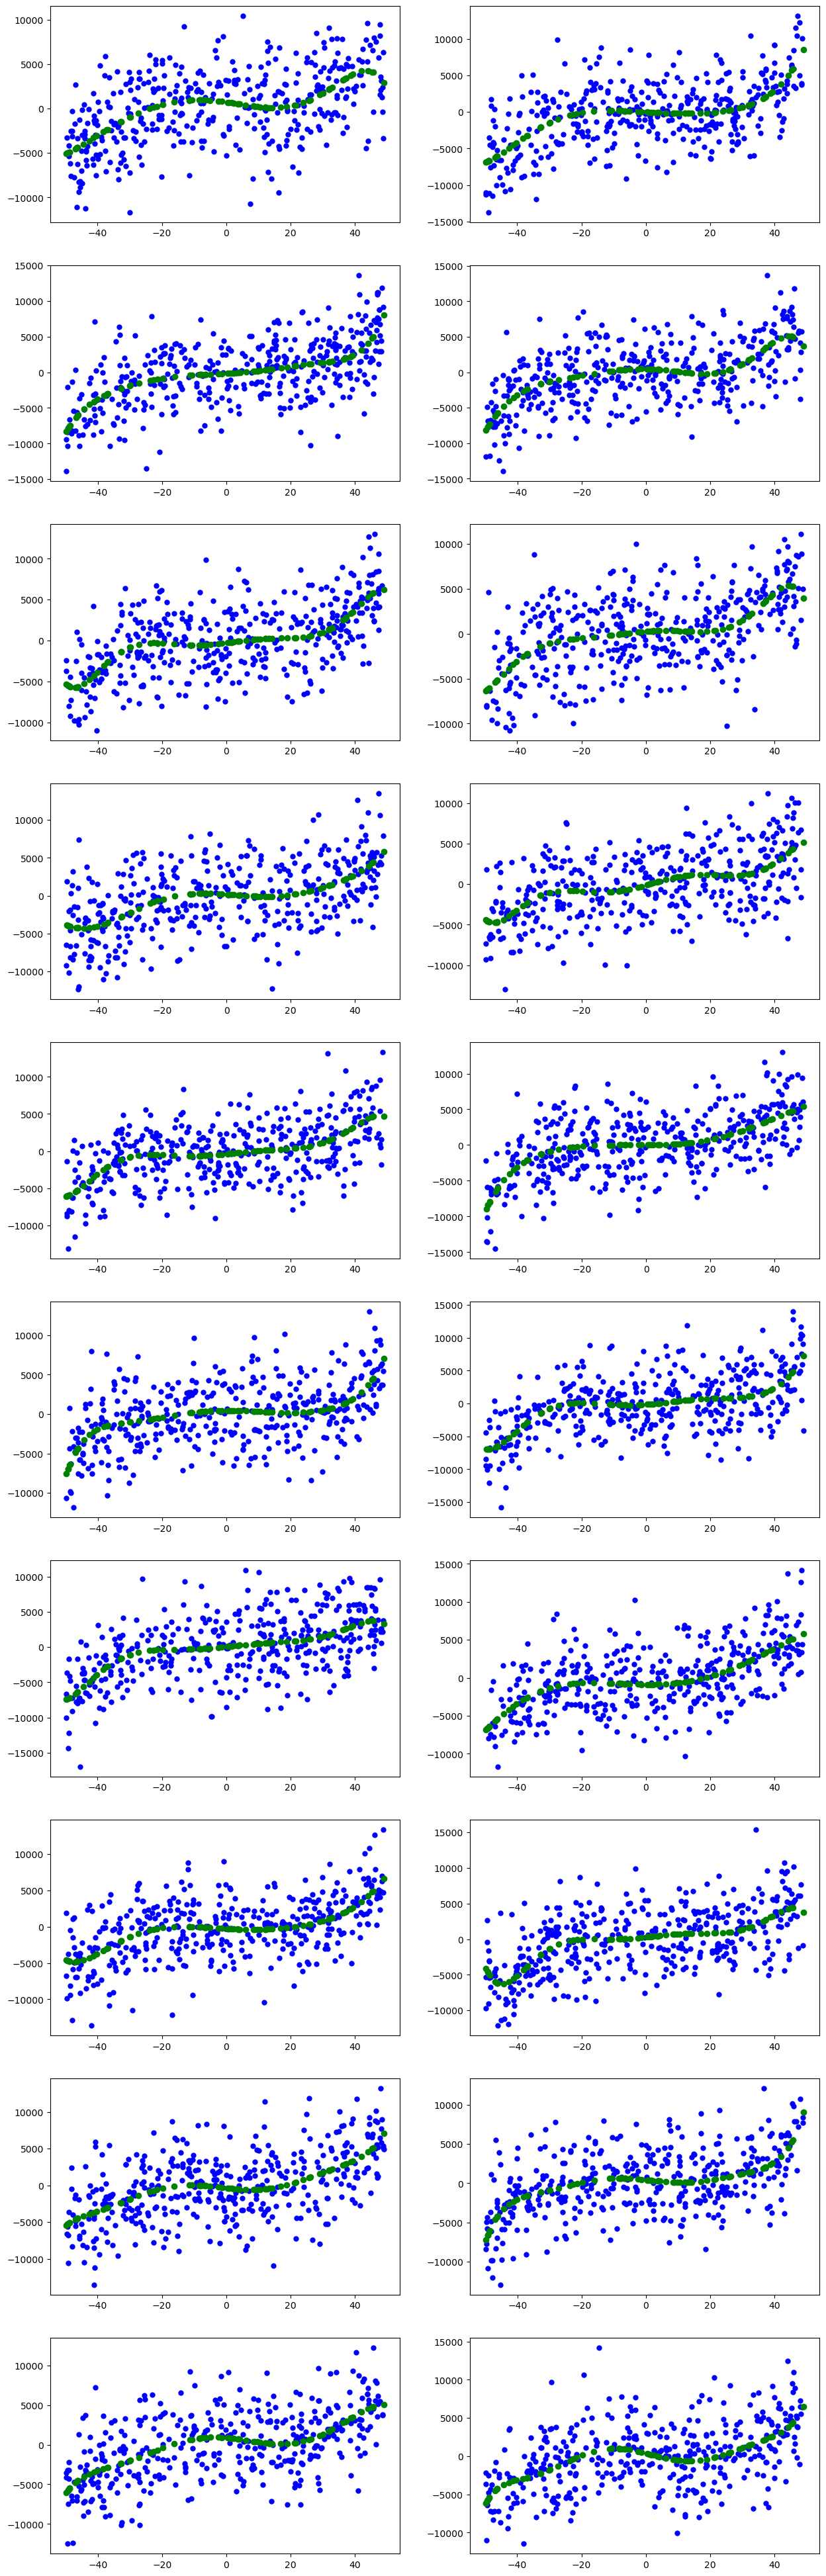

Model degree 8 with different datasets:


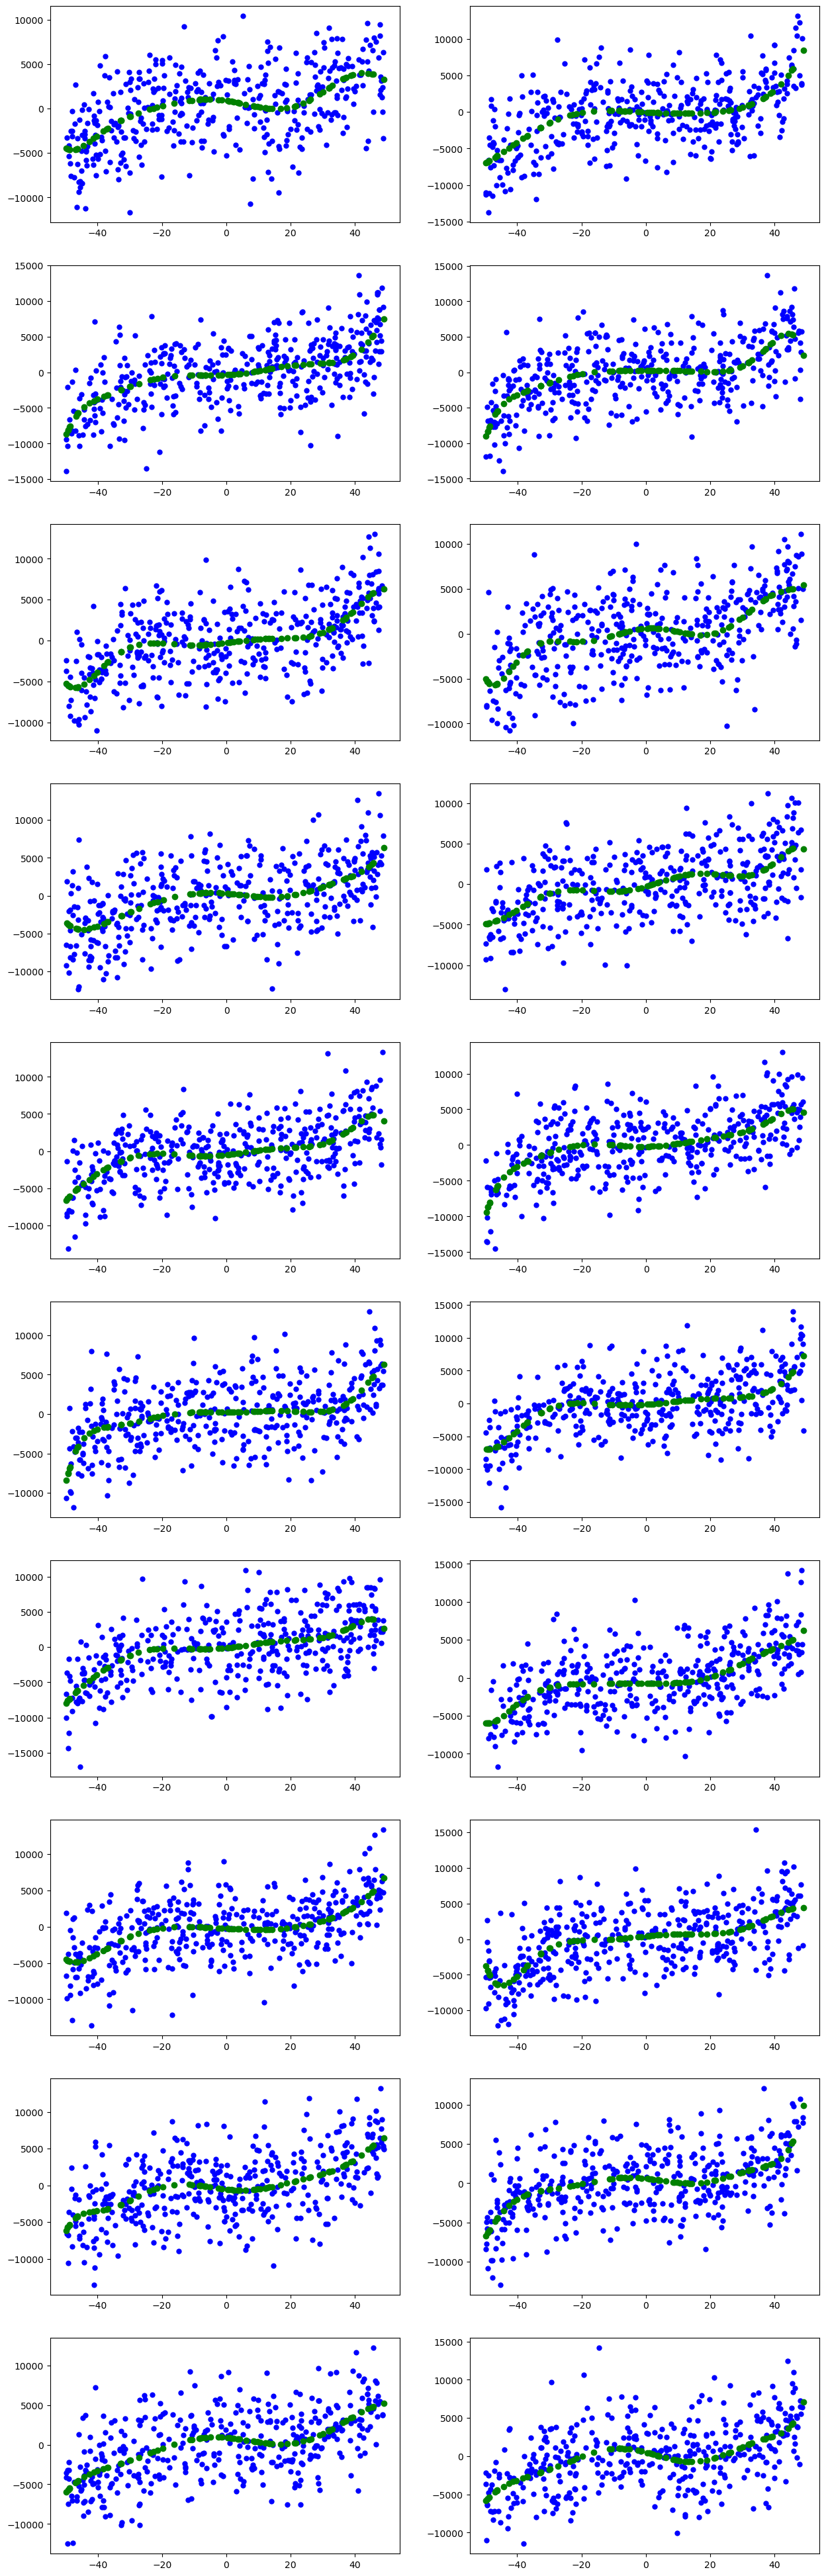

Model degree 9 with different datasets:


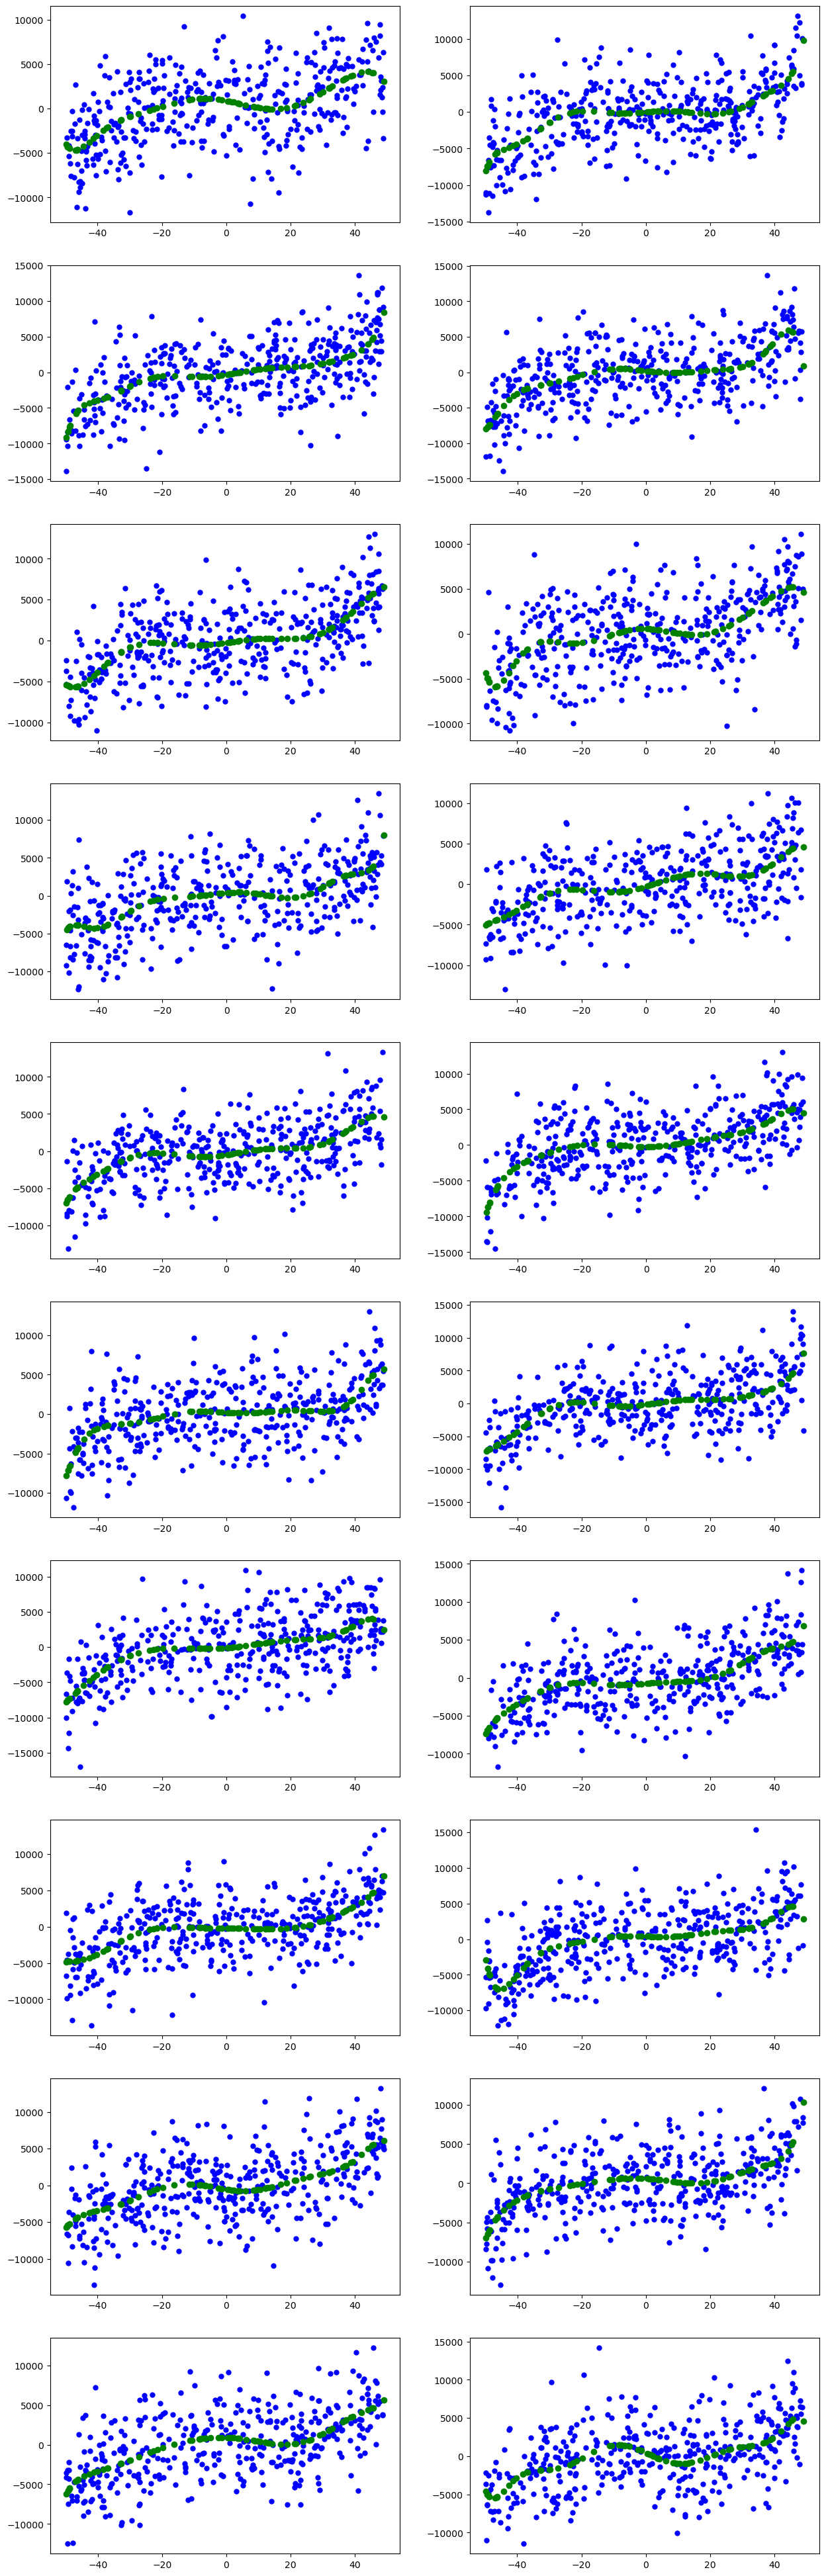

In [62]:
d = range(1, 10) # degrees of the polynomial regression
df_bias_var = pd.DataFrame(index=['bias', 'variance'])
for i in d:
    fig, axes = plt.subplots(10, 2, figsize=(15, 50))
    poly = PolynomialFeatures(i)
    index = 0 # index of ploting graph
    print('Model degree {} with different datasets:'.format(i))
    Ys_pred_var = np.ones((80, 20)) # list of biases of the model on all datasets 
    Ys_pred_bias = np.ones((80, 20))
    for r, k in zip(x_train, y_train):
        xTrain, xTest =  poly.fit_transform(r.reshape(-1, 1)), poly.fit_transform(x_test.reshape(-1, 1))
        axes[index // 2][index % 2].plot(r, k, 'b.', markersize=10) # plot the dataset

        model = linear_model.LinearRegression().fit(xTrain, k)
        y_pred = model.predict(xTest)
        Ys_pred_var[:, index] = y_pred
        Ys_pred_bias[:, index] = np.abs(y_pred-y_test)
        axes[index // 2][index % 2].plot(x_test, y_pred, 'go', linewidth=5) # plot the model line on the dataset that it fits 
        index += 1
        
    df_bias_var['degree {}'.format(i)] = [np.average(np.average(Ys_pred_bias, axis=1), axis=0), np.average(np.var(Ys_pred_var, axis=1), axis=0)]
    plt.show()


In [63]:
df_bias_var.head()

degree 1       degree 2       degree 3       degree 4  \
bias        838.417801     841.983375     302.023878     355.336435   
variance  70545.489146  125870.855549  150073.739546  212235.708326   

               degree 5       degree 6       degree 7       degree 8  \
bias         398.466692     432.478292     454.807994     478.427947   
variance  276388.480250  316863.499039  357511.315054  404290.843003   

               degree 9  
bias         496.495519  
variance  458768.837654

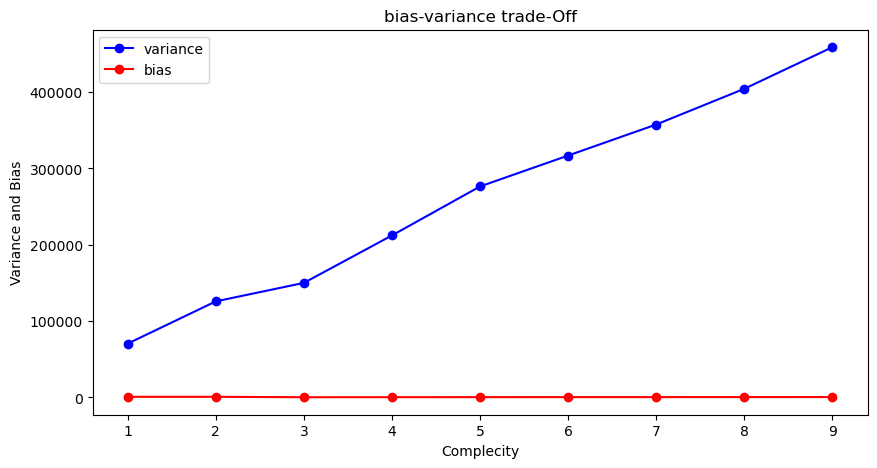

In [65]:
bias = df_bias_var.loc['bias', :].values
variance = df_bias_var.loc['variance'].values
degrees = range(1, 10)
fig, axes = plt.subplots(1, figsize=(10, 5))
axes.plot(degrees, variance, 'bo-')
axes.plot(degrees, bias, 'ro-')
plt.title('bias-variance trade-Off')
plt.xlabel('Complecity')
plt.ylabel('Variance and Bias')
plt.legend(['variance', 'bias'])
plt.show();

## Report about what happens:
- As we can see above(the figure) we note that as we increase the complecity(order) of the model the bias decreases a little bit (tile 3rd order and start increasing 'causing underfitting' after that) but the variance increases greatly(causing overfitting). so the threshold is 3rd order(best of them). 
- We note here that these models(from degree 1 to 9) do not fit the data well.
- the data here can not be fitted by polynomial regression, there are a lot of outliers that increase error.